<a href="https://colab.research.google.com/github/m-hossni/Tensorflow-and-Keras-INFO-6146-F24/blob/main/Usman_double_layered_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels)= fashion_mnist.load_data()

x_train = train_images.reshape(-1, 28 * 28) / 255.0
x_test = test_images.reshape(-1, 28 * 28) / 255.0

In [73]:
x_train.shape

(60000, 784)

In [74]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(28*28,) ))
Dropout(0.2),
model.add(Dense(128, activation='relu' ))
Dropout(0.2),
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [75]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train,train_labels, batch_size=64, shuffle=True,  epochs=25, verbose=1, validation_split=0.2)

Epoch 1/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7583 - loss: 0.7003 - val_accuracy: 0.8399 - val_loss: 0.4494
Epoch 2/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8592 - loss: 0.3830 - val_accuracy: 0.8609 - val_loss: 0.3808
Epoch 3/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8737 - loss: 0.3440 - val_accuracy: 0.8734 - val_loss: 0.3515
Epoch 4/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8862 - loss: 0.3097 - val_accuracy: 0.8734 - val_loss: 0.3453
Epoch 5/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8894 - loss: 0.2930 - val_accuracy: 0.8756 - val_loss: 0.3410
Epoch 6/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8974 - loss: 0.2798 - val_accuracy: 0.8893 - val_loss: 0.3225
Epoch 7/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8995 - loss: 0.2733 - val_accuracy: 0.8879 - val_loss: 0.3187
Epoch 8/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9076 - loss: 0.2512 - val_accuracy: 0.

In [76]:
y_pred = model.predict(x_test)
y_pred = y_pred.argmax(axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [77]:
from sklearn.metrics import accuracy_score
accuracy_score(test_labels,y_pred)

0.8856

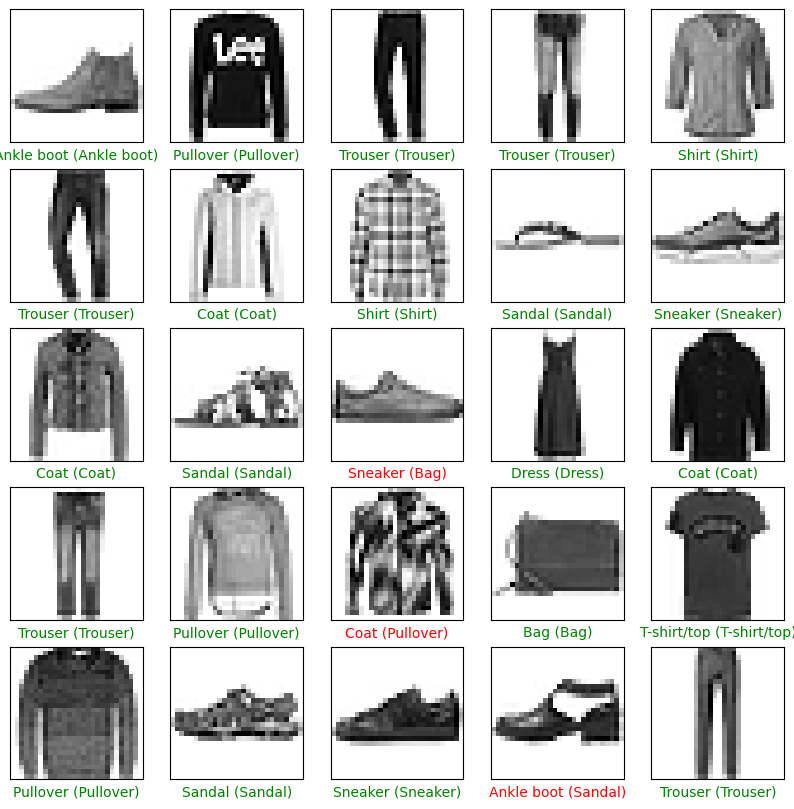

In [78]:
import matplotlib.pyplot as plt

# Class names for the Fashion MNIST dataset
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Plot 25 images with their labels
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)  # Display in grayscale
    label_color = 'green' if test_labels[i] == y_pred[i] else 'red'
    plt.xlabel(f"{class_names[test_labels[i]]} ({ class_names[y_pred[i]]})", color=label_color )  # Show true label
plt.show()

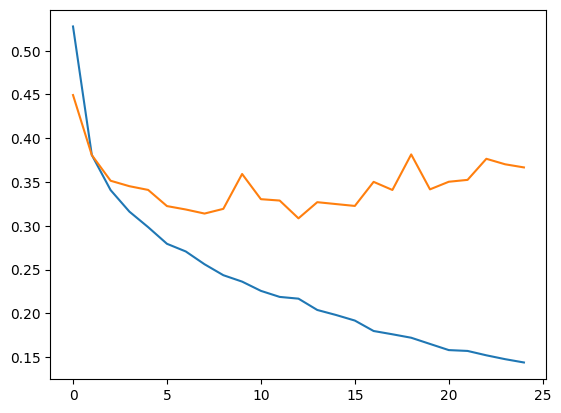

In [79]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])